# Import Pakeage

In [51]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


# Data Preprocessing

In [52]:
# Load Fashion Minst Dataset 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [53]:
# Data Reshape
x_train = x_train.reshape(60000, 784)
x_test_ori = x_test.copy()
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [54]:
# Encording data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [55]:
# Data split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=264)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


# Training ANN Model

In [56]:
# Model Structure
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),

    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.3),

    BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),

    BatchNormalization(),
    Dense(10,activation='sigmoid'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_24 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_25 (Bat  (None, 64)               256       
 chNormalization)                                     

In [57]:
model.compile(optimizer=Adam(learning_rate=0.1,decay=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train,
                  batch_size=128,
                  epochs=160,
                  verbose=1,
                  validation_data=(x_val,y_val))

Epoch 1/160
375/375 [==============================] - 1s 2ms/step - loss: 1.0094 - accuracy: 0.6134 - val_loss: 0.7065 - val_accuracy: 0.7347
Epoch 2/160
375/375 [==============================] - 1s 2ms/step - loss: 0.7858 - accuracy: 0.7204 - val_loss: 0.5489 - val_accuracy: 0.7993
Epoch 3/160
375/375 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.7528 - val_loss: 0.5345 - val_accuracy: 0.7970
Epoch 4/160
375/375 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.7713 - val_loss: 0.5034 - val_accuracy: 0.8233
Epoch 5/160
375/375 [==============================] - 1s 2ms/step - loss: 0.6442 - accuracy: 0.7844 - val_loss: 0.4686 - val_accuracy: 0.8492
Epoch 6/160
375/375 [==============================] - 1s 2ms/step - loss: 0.6215 - accuracy: 0.7925 - val_loss: 0.4442 - val_accuracy: 0.8493
Epoch 7/160
375/375 [==============================] - 1s 2ms/step - loss: 0.6062 - accuracy: 0.7990 - val_loss: 0.4592 - val_accuracy: 0.8457

# Result

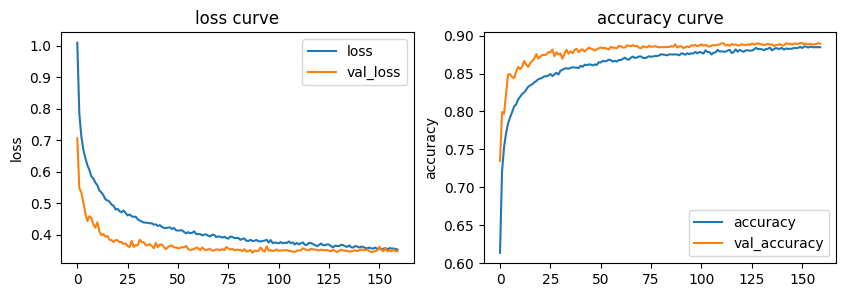

In [59]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [60]:
result = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8793


MLP score: 87.93%
313/313 [==============================] - 0s 1ms/step


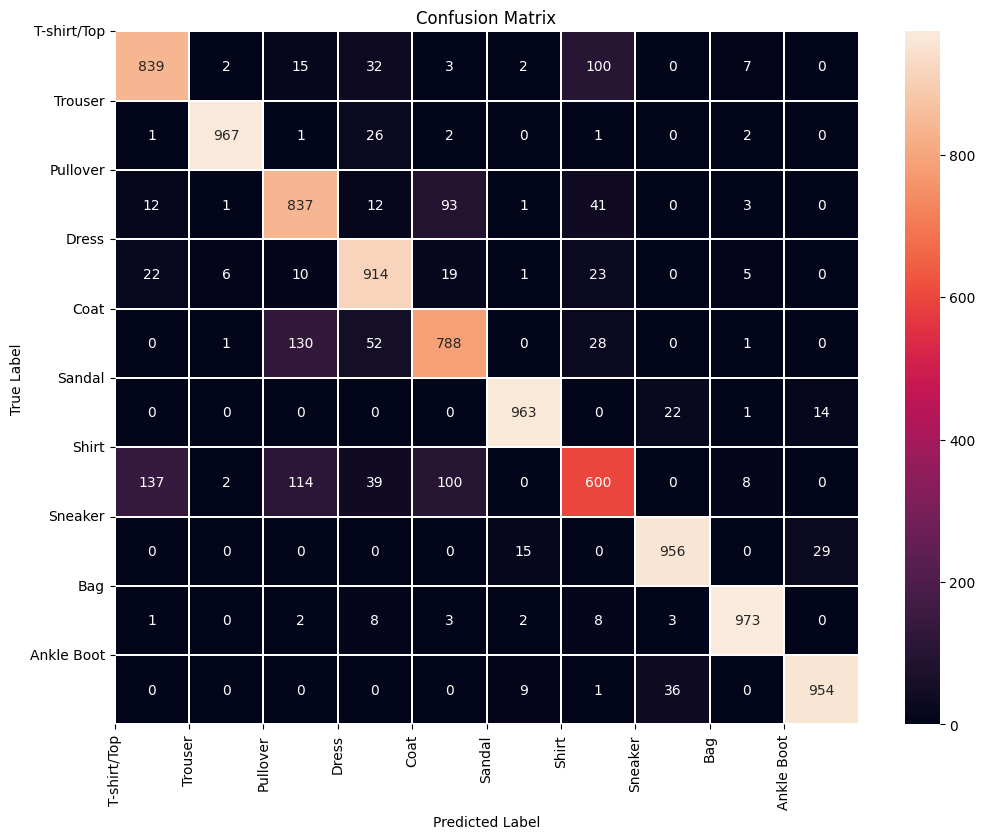

In [61]:
print('MLP score: {:.2%}'.format(result[1]))

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
          
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes, rotation=0)
plt.title("Confusion Matrix")
plt.show()

Predict shirt as T-shirt: 137


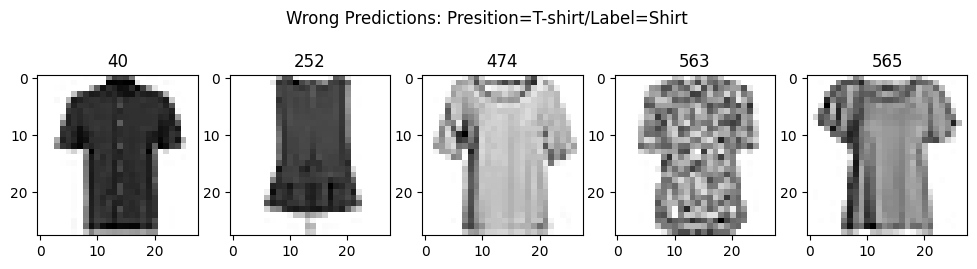

In [62]:
# shirt:6 T-shirt:0
incorrect = []
for i in range(len(y_test)):
    if (y_pred_classes[i]==0) and (y_true[i]==6):
        incorrect.append(i)

print('Predict shirt as T-shirt:',len(incorrect))

fig, ax = plt.subplots(1, 5, figsize=(12, 3))
# Plot a boxplot with Seaborn
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_ori[incorrect[i]], cmap='binary')
    plt.title(incorrect[i])
fig.suptitle('Wrong Predictions: Presition=T-shirt/Label=Shirt')
plt.show()